<a href="https://colab.research.google.com/github/ZHAbotorabi/Testing-Models/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

### Real Application: Assessing the Effectiveness of a New Drug

The provided code can be applied in a **clinical trial setting** to evaluate whether the difference in outcomes between a control group (e.g., placebo) and an experimental group (e.g., new drug) is statistically significant.

---

### Scenario
A pharmaceutical company tests a new drug's impact on reducing the duration of a specific illness.

- Patients are divided into two groups:
  - **Control**: Receives a placebo.
  - **Experimental**: Receives the new drug.
  
- The mean illness duration for each group is measured, and the observed difference is calculated.
- To test whether the observed difference is due to the drug's effectiveness or random chance, a **permutation test** is performed.

---

### Steps

#### 1. Data Collection
- Illness durations are collected for patients in both groups.
- Example:
  - **Control**: `[7, 5, 4,...]`
  - **Experimental**: `[5, 8,...]`

#### 2. Observed Difference
- Compute the difference in mean durations between the two groups.

#### 3. Permutations
- Randomly shuffle the data and reassign patients to groups.
- Recalculate the mean difference for each permutation.
- This process builds a distribution of differences under the null hypothesis (no actual drug effect).

#### 4. Statistical Inference
- Compare the observed difference to the permutation distribution.
- If the observed difference is extreme (e.g., in the top or bottom 5% of the distribution), conclude the drug has a significant effect.

---

### Example with Code
Suppose we observe that the experimental group recovers faster, but we need evidence that the improvement isn't just due to chance. Using the provided code:

1. **Input**:
   - Actual illness durations for control and experimental groups.
2. **Output**:
   - A distribution of differences under the null hypothesis.
3. **Inference**:
   - If the observed difference lies outside the typical range (e.g., a p-value < 0.05), we conclude the drug effect is statistically significant.

---

### Visualization
The histogram generated in the code will show:
- The distribution of permuted differences.
- The observed difference marked as a red line.
- Whether the observed difference is within the expected range or significant.

---

### Benefits of This Method
This method is **non-parametric**, meaning it does not assume the data follows a normal distribution. It is robust and particularly suitable for small datasets, as often encountered in initial clinical trials.


# Hypothesis Testing

### 1. Creating a Sample Distribution from our Control and Experimental groups

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "Data_Drug.xlsx"
df = pd.read_excel(file_name)
df.head()

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8


In [2]:
df.tail()

,group,mean_duration
75,Experimental,4
76,Experimental,3
77,Experimental,3
78,Experimental,5
79,Experimental,5


In [3]:
df['group'].unique()


array(['Control', 'Experimental'], dtype=object)

In [4]:
# Calculating the mean for each group
group_means = df.groupby('group')['mean_duration'].mean()

print(group_means)

group
Control         5.4
Experimental    4.8
Name: mean_duration, dtype: float64


In [5]:
# Calculating the means separately
control_mean = df[df['group'] == 'Control']['mean_duration'].mean()
experimental_mean = df[df['group'] == 'Experimental']['mean_duration'].mean()

# Printing the results
print(f"Mean duration for Control group: {control_mean}")
print(f"Mean duration for Experimental group: {experimental_mean}")

Mean duration for Control group: 5.4
Mean duration for Experimental group: 4.8


In [6]:
# Calculating the means separately
control_count = df[df['group'] == 'Control']['mean_duration'].count()
experimental_count = df[df['group'] == 'Experimental']['mean_duration'].count()

# Printing the results
print("Control count = " +str(control_count))
print("Experimental count = " + str(experimental_count))

Control count = 40
Experimental count = 40


# Let's run 10,000 Permutations

Observed difference in means: -0.6000000000000005
Permutation Summary:
         perm_diff
count  10000.00000
mean       0.00938
std        0.33819
min       -1.30000
25%       -0.20000
50%        0.00000
75%        0.25000
max        1.25000


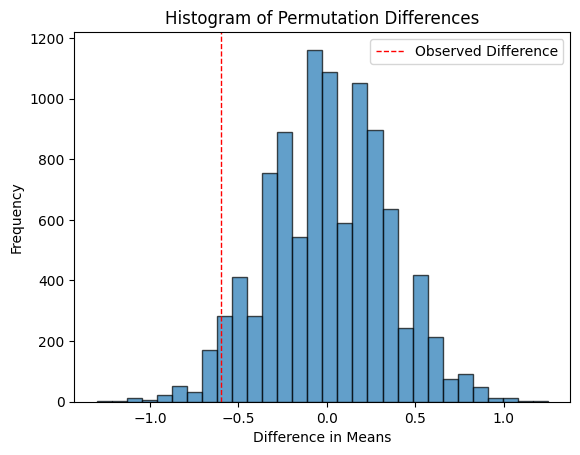

In [30]:
observed_diff = experimental_mean - control_mean

print(f"Observed difference in means: {observed_diff}")

# Permutations
n_permutations = 10000
combined = df['mean_duration'].values
perm_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_control_mean = np.mean(combined[:control_count])  # First 40 values as Control
    perm_experimental_mean = np.mean(combined[experimental_count:])  # Last 40 values as Experimental
    mean_differences = perm_experimental_mean - perm_control_mean
    perm_diffs.append(mean_differences)


# Convert results to a DataFrame
perm_results = pd.DataFrame({'perm_diff': perm_diffs})

# Print a summary of the results
print("Permutation Summary:")
print(perm_results.describe())

# Optional: Plot histogram of permuted differences
import matplotlib.pyplot as plt

plt.hist(perm_diffs, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=1, label='Observed Difference')
plt.title('Histogram of Permutation Differences')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## This script performs the following:

1. Calculates the observed difference in means.
2. Runs 10,000 permutations to calculate the differences in means under random shuffling.
3. Summarizes the permutation differences.
4. Visualizes the differences with a histogram, highlighting the observed difference in red.

## How many values exceed the mean difference of 0.6?

In [31]:
# Convert our mean_differences to a data frame for easy manipulation
mean_differences = pd.DataFrame(perm_diffs)

# Get the length of this series to count the number of value exceeding 0.6
exceeds_mean_diff = len(mean_differences[mean_differences[0] >= 0.6])
print(exceeds_mean_diff)

453


In [32]:
# Number of trials we performed was 10,000
# P-Value is equal to the

p_value = exceeds_mean_diff / n_permutations
print(p_value)

0.0453


## **Make a Decision**:
   - If \(p\)-value < \(\alpha\), reject \(H_0\).
   - Otherwise, fail to reject \(H_0\).
## **Interpret the Results**:
   - Explain the findings in the context of the problem.

In [33]:
# Hypothetical p-value obtained from a statistical test
#p_value = 0.04  # Example value

# Significance level (alpha)
alpha = 0.05

# Make a decision
if p_value < alpha:
    decision = "Reject the null hypothesis (H0:The new drug has no effect on recovery time compared to a placebo.)"
    interpretation = "The results are statistically significant. There is evidence to suggest the alternative hypothesis (H1) is true."
else:
    decision = "Fail to reject the null hypothesis (H0)"
    interpretation = "The results are not statistically significant. There is insufficient evidence to support the alternative hypothesis (H1: The new drug reduces recovery time compared to a placebo.)."

# Output the decision and interpretation
print(f"Decision: {decision}")
print(f"Interpretation: {interpretation}")


Decision: Reject the null hypothesis (H0:The new drug has no effect on recovery time compared to a placebo.)
Interpretation: The results are statistically significant. There is evidence to suggest the alternative hypothesis (H1) is true.


### What is a Hypothesis Test?

A hypothesis test is a statistical method used to determine whether there is enough evidence in a sample of data to support a certain claim (hypothesis) about a population.

---

### Key Concepts in Hypothesis Testing

#### 1. **Null Hypothesis (\(H_0\))**
- The default assumption or claim.
- States that there is no effect, no difference, or no relationship.
- **Example**: "The new drug has no effect on recovery time compared to a placebo."

#### 2. **Alternative Hypothesis (\(H_1\) or \(H_a\))**
- The competing claim.
- States that there is an effect, difference, or relationship.
- **Example**: "The new drug reduces recovery time compared to a placebo."

#### 3. **Significance Level (\(\alpha\))**
- The threshold for deciding whether to reject the null hypothesis.
- Common values: \(\alpha = 0.05\) (5%) or \(\alpha = 0.01\) (1%).
- Represents the probability of rejecting the null hypothesis when it is actually true (**Type I error**).

#### 4. **P-value**
- The probability of observing the data (or something more extreme) if the null hypothesis is true.
- If \(p\)-value < \(\alpha\), reject \(H_0\).

#### 5. **Test Statistic**
- A numerical value calculated from the data to help decide whether to reject \(H_0\).
- **Examples**: \(z\)-score, \(t\)-statistic, or difference in means.

#### 6. **Conclusion**
- Based on the test, either:
  - Reject \(H_0\).
  - Fail to reject \(H_0\).

---

### Steps in Hypothesis Testing

1. **Formulate Hypotheses**:
   - Define \(H_0\) and \(H_1\).

2. **Choose a Test and Significance Level (\(\alpha\))**:
   - Select the statistical test (e.g., t-test, chi-square test, permutation test) and \(\alpha\).

3. **Calculate the Test Statistic and P-value**:
   - Compute the statistic based on your data.
   - Derive the \(p\)-value.

4. **Make a Decision**:
   - If \(p\)-value < \(\alpha\), reject \(H_0\).
   - Otherwise, fail to reject \(H_0\).

5. **Interpret the Results**:
   - Explain the findings in the context of the problem.

---

### Example of Hypothesis Testing

#### **Scenario**:
A company tests whether a new drug reduces illness recovery time compared to a placebo.

1. **Hypotheses**:
   - \(H_0\): The drug has no effect (mean recovery time is the same for both groups).
   - \(H_1\): The drug reduces recovery time (mean recovery time is shorter for the drug group).

2. **Significance Level**:
   - Choose \(\alpha = 0.05\).

3. **Perform the Test**:
   - Use a t-test or permutation test to calculate the \(p\)-value.

4. **Decision**:
   - If \(p\)-value < 0.05, reject \(H_0\).
   - Otherwise, fail to reject \(H_0\).

5. **Conclusion**:
   - If \(H_0\) is rejected, the data provides evidence that the drug reduces recovery time.

---

### Types of Errors

#### 1. **Type I Error**
- Rejecting \(H_0\) when it is actually true.
- False positive.

#### 2. **Type II Error**
- Failing to reject \(H_0\) when \(H_1\) is true.
- False negative.

---

### Summary
Hypothesis testing is a cornerstone of statistical analysis, used in fields like medicine, business, science, and engineering to validate or reject claims based on data.


### Example: Permutation Test Explained

Imagine a **clinical trial** where you are testing a new drug to see if it reduces illness recovery time compared to a placebo. The trial data includes the recovery times for two groups:

- **Control group (placebo)**: `[7, 5, 4]`  
- **Experimental group (drug)**: `[5, 8]`  

The **observed difference** in the mean recovery times is calculated as:

\[
\text{Mean (Experimental)} - \text{Mean (Control)} = \frac{5 + 8}{2} - \frac{7 + 5 + 4}{3} = 6.5 - 5.33 = 1.17
\]

---

### Null Hypothesis (\(H_0\)):
The drug has no effect, and the observed difference is due to random chance.

---

### Step-by-Step Permutation Test

#### **1. Combine the Data**
Combine all recovery times into a single pool:
\[
[7, 5, 4, 5, 8]
\]

#### **2. Shuffle and Reassign Groups**
Randomly shuffle the combined data and split it into two groups, preserving the original group sizes:
- Example shuffle: `[5, 8, 7, 4, 5]`
- New groups:
  - **Shuffled Control**: `[5, 8, 7]`
  - **Shuffled Experimental**: `[4, 5]`

#### **3. Recalculate the Mean Difference**
Calculate the mean difference for the shuffled groups:
\[
\text{Mean (Shuffled Experimental)} - \text{Mean (Shuffled Control)} = \frac{4 + 5}{2} - \frac{5 + 8 + 7}{3} = 4.5 - 6.67 = -2.17
\]

#### **4. Repeat for Many Permutations**
Repeat the shuffling process thousands of times (e.g., 10,000 permutations), and record the mean difference for each permutation.

---

### Building the Null Distribution
By shuffling the data and calculating mean differences repeatedly, you create a distribution of mean differences under the **null hypothesis** (no drug effect). This distribution reflects what differences would look like if the observed difference were purely due to chance.

---

### **Compare the Observed Difference**
Once the null distribution is built:
1. Compare the observed difference (1.17) to this distribution.
2. Calculate the **p-value**: The proportion of permuted differences that are as extreme as or more extreme than the observed difference.

---

### **Example Outcome**
- Suppose after 10,000 permutations, 300 permutations show a difference as extreme as or more extreme than the observed difference of 1.17.
- The p-value is calculated as:
  \[
  \text{p-value} = \frac{\text{Number of extreme differences}}{\text{Total permutations}} = \frac{300}{10000} = 0.03
  \]

---

### **Interpretation**
- If \(p\)-value \(= 0.03 < 0.05\), you reject the null hypothesis and conclude that the drug has a significant effect on recovery time.
- Otherwise, you fail to reject \(H_0\), meaning there isn't enough evidence to conclude the drug is effective.

---

This permutation test is robust because it does not assume the data follows a normal distribution, making it ideal for small sample sizes like this clinical trial.


## Example: "np.random.randint(0,2)==True"
it is often used to randomly generate binary values (0 or 1), commonly applied in simulations, sampling, or initializing binary states. It can also be useful for shuffling data or creating random binary masks in data processing tasks.

Mean Differences Mean - 0.0009848481331028304


<ipython-input-34-f794cdd288bd>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_differences_2)


<Axes: ylabel='Density'>

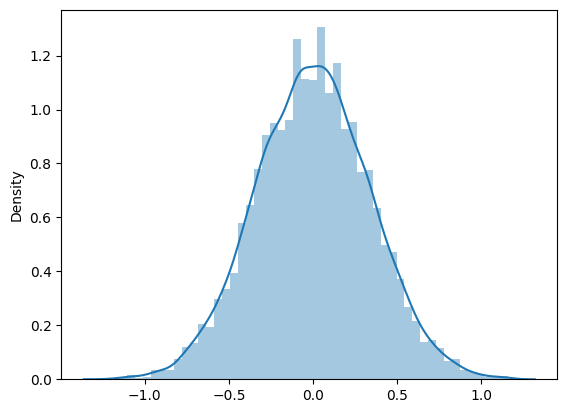

In [34]:
#mean_difference = control_mean - experimental_mean
data_points = list(df['mean_duration'])
mean_differences_2 = []
number_of_iterations = 10000

for i in range(number_of_iterations):
    group_1 = []
    group_2 = []
    for data_point in data_points:
        random_assignment = np.random.randint(0,2)==True # Output: 0 or 1
        if random_assignment:
            group_1.append(data_point)
        else:
            group_2.append(data_point)

    trial_mean_difference = np.mean(group_2) - np.mean(group_1)
    mean_differences_2.append(trial_mean_difference)

print("Mean Differences Mean - " + str(np.array(mean_differences_2).mean()))
# Generate Frequency or Histogram Plot
sns.distplot(mean_differences_2)